In [67]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import chardet

In [69]:
with open("baskets.csv", "rb") as f:
    result = chardet.detect(f.read())

df = pd.read_csv("baskets.csv", header=None, encoding=result["encoding"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
1,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df = df.dropna(how="all", axis=0)
df = df.dropna(how="all", axis=1)

transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
print(len(transactions))
print(transactions[:5])

7501
[['креветки', 'миндаль', 'авокадо', 'овощная смесь', 'зеленый виноград', 'цельнозерновая мука', 'батат', 'творог', 'энергетический напиток', 'томатный сок', 'низкокалорийный йогурт', 'зеленый чай', 'мед', 'салат', 'минеральная вода', 'лосось', 'ягодный сок', 'замороженный смузи', 'шпинат', 'оливковое масло'], ['гамбургер', 'фрикадельки', 'яйца'], ['чатни'], ['индейка', 'авокадо'], ['минеральная вода', 'молоко', 'энергетический батончик', 'рис', 'зеленый чай']]


In [89]:
te = TransactionEncoder()
te_transformed = te.fit(transactions).transform(transactions)
df_transformed = pd.DataFrame(te_transformed, columns=te.columns_)
df_transformed

,авокадо,аксессуары,баклажаны,батат,батончик без глютена,бекон,белое вино,белый сыр,блинчики,ветчина,...,чили,шампанское,шампунь,шоколад,шпинат,энергетический батончик,энергетический напиток,эскалоп,ягодный сок,яйца
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [109]:
support_threshold = 0.002
confidence_thresholds = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

support_itemsets_df = pd.DataFrame()
rules_df = pd.DataFrame()
execution_times = []
rules_count = []

for confidence_threshold in confidence_thresholds:
    print(f"\nПорог достоверности: {confidence_threshold}")

    frequent_itemsets = apriori(df_transformed, min_support=support_threshold, use_colnames=True)
    
    frequent_itemsets["support_threshold"] = support_threshold
    frequent_itemsets["confidence_threshold"] = confidence_threshold
    frequent_itemsets["itemset_size"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))

    frequent_itemsets = frequent_itemsets.sort_values(by=["itemset_size", "support"], ascending=[True, False])

    support_itemsets_df = pd.concat([support_itemsets_df, frequent_itemsets], ignore_index=True)

    start_time = time.perf_counter()
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)
    end_time = time.perf_counter()
    print(f"Время выполнения association_rules: {end_time - start_time} секунд")

    execution_times.append(end_time - start_time)
    rules_subset = rules[["antecedents", "consequents", "support", "confidence"]].copy()
    rules_subset["confidence_threshold"] = confidence_threshold

    rules_subset = rules_subset.sort_values(by=["support"], ascending=False)

    rules_df = pd.concat([rules_df, rules_subset], ignore_index=True)

    rules_count.append(len(rules_subset))

    print("\nЧастые наборы (support_itemsets_df)")
    display(frequent_itemsets)
    print("\nАссоциативные правила (rules_df)")
    display(rules_subset)


Порог достоверности: 0.7
Время выполнения association_rules: 0.020890899999358226 секунд

Частые наборы (support_itemsets_df)


,support,itemsets,support_threshold,confidence_threshold,itemset_size
47,0.238368,(минеральная вода),0.002,0.7,1
42,0.187975,(макароны),0.002,0.7,1
110,0.179709,(яйца),0.002,0.7,1
28,0.170911,(картофель-фри),0.002,0.7,1
104,0.163845,(шоколад),0.002,0.7,1
...,...,...,...,...,...
2476,0.002133,"(торт, минеральная вода, макароны, яйца)",0.002,0.7,4
2480,0.002133,"(молоко, помидоры, макароны, рис)",0.002,0.7,4
2485,0.002133,"(растительное масло, минеральная вода, яйца, м...",0.002,0.7,4
2487,0.002133,"(торт, минеральная вода, яйца, молоко)",0.002,0.7,4



Ассоциативные правила (rules_df)


,antecedents,consequents,support,confidence,confidence_threshold
0,"(эскалоп, грибной соус)",(макароны),0.004266,0.744186,0.7
4,"(растительное масло, яйца, макароны)",(минеральная вода),0.003066,0.718750,0.7
3,"(замороженные овощи, суп, молоко)",(минеральная вода),0.003066,0.766667,0.7
5,"(замороженные овощи, шоколад, оливковое масло)",(минеральная вода),0.002800,0.700000,0.7
6,"(яйца, оливковое масло, молоко)",(минеральная вода),0.002666,0.714286,0.7
7,"(креветки, замороженные овощи, говяжий фарш)",(макароны),0.002533,0.791667,0.7
1,"(макароны, обезжиренное молоко)",(минеральная вода),0.002533,0.730769,0.7
9,"(блинчики, макароны, суп)",(минеральная вода),0.002266,0.772727,0.7
8,"(блинчики, растительное масло, макароны)",(минеральная вода),0.002266,0.739130,0.7
2,"(красное вино, индейка)",(минеральная вода),0.002133,0.727273,0.7



Порог достоверности: 0.75
Время выполнения association_rules: 0.01953489999868907 секунд

Частые наборы (support_itemsets_df)


,support,itemsets,support_threshold,confidence_threshold,itemset_size
47,0.238368,(минеральная вода),0.002,0.75,1
42,0.187975,(макароны),0.002,0.75,1
110,0.179709,(яйца),0.002,0.75,1
28,0.170911,(картофель-фри),0.002,0.75,1
104,0.163845,(шоколад),0.002,0.75,1
...,...,...,...,...,...
2476,0.002133,"(торт, минеральная вода, макароны, яйца)",0.002,0.75,4
2480,0.002133,"(молоко, помидоры, макароны, рис)",0.002,0.75,4
2485,0.002133,"(растительное масло, минеральная вода, яйца, м...",0.002,0.75,4
2487,0.002133,"(торт, минеральная вода, яйца, молоко)",0.002,0.75,4



Ассоциативные правила (rules_df)


,antecedents,consequents,support,confidence,confidence_threshold
0,"(замороженные овощи, суп, молоко)",(минеральная вода),0.003066,0.766667,0.75
1,"(креветки, замороженные овощи, говяжий фарш)",(макароны),0.002533,0.791667,0.75
2,"(блинчики, макароны, суп)",(минеральная вода),0.002266,0.772727,0.75
3,"(блинчики, говяжий фарш, рис)",(минеральная вода),0.002133,0.842105,0.75
4,"(замороженные овощи, помидоры, оливковое масло)",(макароны),0.002133,0.842105,0.75
5,"(молоко, помидоры, рис)",(макароны),0.002133,0.800000,0.75



Порог достоверности: 0.8
Время выполнения association_rules: 0.019076900000072783 секунд

Частые наборы (support_itemsets_df)


,support,itemsets,support_threshold,confidence_threshold,itemset_size
47,0.238368,(минеральная вода),0.002,0.8,1
42,0.187975,(макароны),0.002,0.8,1
110,0.179709,(яйца),0.002,0.8,1
28,0.170911,(картофель-фри),0.002,0.8,1
104,0.163845,(шоколад),0.002,0.8,1
...,...,...,...,...,...
2476,0.002133,"(торт, минеральная вода, макароны, яйца)",0.002,0.8,4
2480,0.002133,"(молоко, помидоры, макароны, рис)",0.002,0.8,4
2485,0.002133,"(растительное масло, минеральная вода, яйца, м...",0.002,0.8,4
2487,0.002133,"(торт, минеральная вода, яйца, молоко)",0.002,0.8,4



Ассоциативные правила (rules_df)


,antecedents,consequents,support,confidence,confidence_threshold
0,"(блинчики, говяжий фарш, рис)",(минеральная вода),0.002133,0.842105,0.8
1,"(замороженные овощи, помидоры, оливковое масло)",(макароны),0.002133,0.842105,0.8



Порог достоверности: 0.85
Время выполнения association_rules: 0.018037500001810258 секунд

Частые наборы (support_itemsets_df)


C:\Users\mazgu\AppData\Local\Temp\ipykernel_2868\395504151.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rules_df = pd.concat([rules_df, rules_subset], ignore_index=True)


,support,itemsets,support_threshold,confidence_threshold,itemset_size
47,0.238368,(минеральная вода),0.002,0.85,1
42,0.187975,(макароны),0.002,0.85,1
110,0.179709,(яйца),0.002,0.85,1
28,0.170911,(картофель-фри),0.002,0.85,1
104,0.163845,(шоколад),0.002,0.85,1
...,...,...,...,...,...
2476,0.002133,"(торт, минеральная вода, макароны, яйца)",0.002,0.85,4
2480,0.002133,"(молоко, помидоры, макароны, рис)",0.002,0.85,4
2485,0.002133,"(растительное масло, минеральная вода, яйца, м...",0.002,0.85,4
2487,0.002133,"(торт, минеральная вода, яйца, молоко)",0.002,0.85,4



Ассоциативные правила (rules_df)


,antecedents,consequents,support,confidence,confidence_threshold



Порог достоверности: 0.9
Время выполнения association_rules: 0.01834669999880134 секунд

Частые наборы (support_itemsets_df)


C:\Users\mazgu\AppData\Local\Temp\ipykernel_2868\395504151.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rules_df = pd.concat([rules_df, rules_subset], ignore_index=True)


,support,itemsets,support_threshold,confidence_threshold,itemset_size
47,0.238368,(минеральная вода),0.002,0.9,1
42,0.187975,(макароны),0.002,0.9,1
110,0.179709,(яйца),0.002,0.9,1
28,0.170911,(картофель-фри),0.002,0.9,1
104,0.163845,(шоколад),0.002,0.9,1
...,...,...,...,...,...
2476,0.002133,"(торт, минеральная вода, макароны, яйца)",0.002,0.9,4
2480,0.002133,"(молоко, помидоры, макароны, рис)",0.002,0.9,4
2485,0.002133,"(растительное масло, минеральная вода, яйца, м...",0.002,0.9,4
2487,0.002133,"(торт, минеральная вода, яйца, молоко)",0.002,0.9,4



Ассоциативные правила (rules_df)


,antecedents,consequents,support,confidence,confidence_threshold



Порог достоверности: 0.95
Время выполнения association_rules: 0.01803950000248733 секунд

Частые наборы (support_itemsets_df)


C:\Users\mazgu\AppData\Local\Temp\ipykernel_2868\395504151.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rules_df = pd.concat([rules_df, rules_subset], ignore_index=True)


,support,itemsets,support_threshold,confidence_threshold,itemset_size
47,0.238368,(минеральная вода),0.002,0.95,1
42,0.187975,(макароны),0.002,0.95,1
110,0.179709,(яйца),0.002,0.95,1
28,0.170911,(картофель-фри),0.002,0.95,1
104,0.163845,(шоколад),0.002,0.95,1
...,...,...,...,...,...
2476,0.002133,"(торт, минеральная вода, макароны, яйца)",0.002,0.95,4
2480,0.002133,"(молоко, помидоры, макароны, рис)",0.002,0.95,4
2485,0.002133,"(растительное масло, минеральная вода, яйца, м...",0.002,0.95,4
2487,0.002133,"(торт, минеральная вода, яйца, молоко)",0.002,0.95,4



Ассоциативные правила (rules_df)


,antecedents,consequents,support,confidence,confidence_threshold


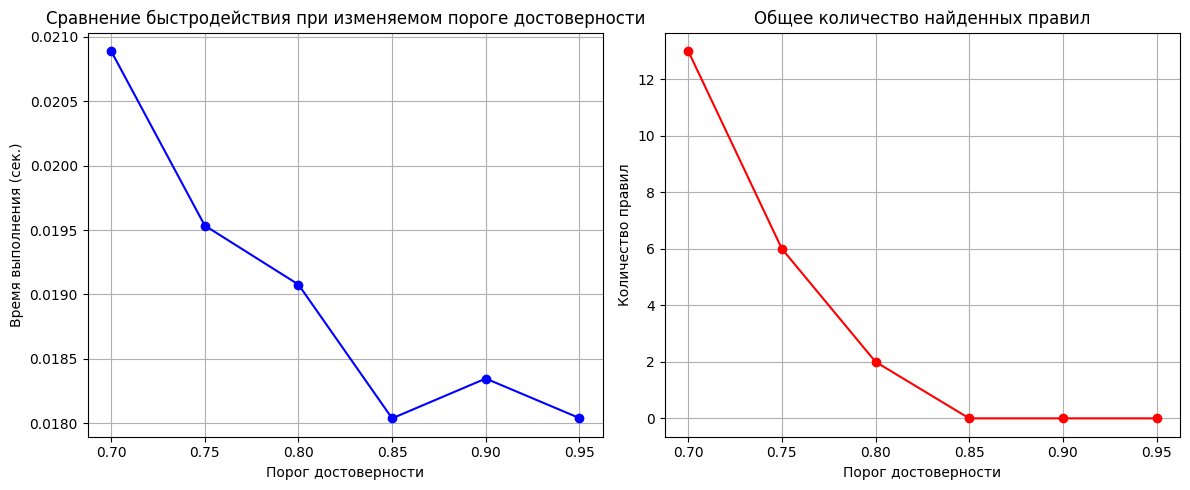

In [110]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(confidence_thresholds, execution_times, marker="o", linestyle="-", color="b")
plt.title("Сравнение быстродействия при изменяемом пороге достоверности")
plt.xlabel("Порог достоверности")
plt.ylabel("Время выполнения (сек.)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(confidence_thresholds, rules_count, marker="o", linestyle="-", color="r")
plt.title("Общее количество найденных правил")
plt.xlabel("Порог достоверности")
plt.ylabel("Количество правил")
plt.grid(True)

plt.tight_layout()
plt.show()

In [51]:
filtered_rules = rules_df[rules_df.apply(lambda x: len(x["antecedents"]) + len(x["consequents"]) <= 7, axis=1)]

filtered_rules = filtered_rules[["antecedents", "consequents", "support", "confidence"]]

filtered_rules = filtered_rules.sort_values(by=["support"], ascending=False)

print("\nСписок правил с антецедентом и консеквентом <= 7 объектов:")
display(filtered_rules)


Список правил с антецедентом и консеквентом <= 7 объектов:


,antecedents,consequents,support,confidence
0,"(эскалоп, грибной соус)",(макароны),0.004266,0.744186
1,"(растительное масло, яйца, макароны)",(минеральная вода),0.003066,0.718750
2,"(замороженные овощи, суп, молоко)",(минеральная вода),0.003066,0.766667
13,"(замороженные овощи, суп, молоко)",(минеральная вода),0.003066,0.766667
3,"(замороженные овощи, шоколад, оливковое масло)",(минеральная вода),0.002800,0.700000
4,"(яйца, оливковое масло, молоко)",(минеральная вода),0.002666,0.714286
5,"(креветки, замороженные овощи, говяжий фарш)",(макароны),0.002533,0.791667
14,"(креветки, замороженные овощи, говяжий фарш)",(макароны),0.002533,0.791667
6,"(макароны, обезжиренное молоко)",(минеральная вода),0.002533,0.730769
7,"(блинчики, макароны, суп)",(минеральная вода),0.002266,0.772727
